## Manifold learning: the S-curve

(based on the [sklearn example](http://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html))

In [1]:
from __future__ import unicode_literals, division, print_function, absolute_import
from builtins import range, str
from time import time
import numpy as np
np.random.seed(28)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from scipy.spatial.distance import pdist, squareform
from sklearn import manifold, decomposition, neighbors, datasets
from sklearn.metrics.pairwise import rbf_kernel, linear_kernel
import tensorflow as tf
tf.set_random_seed(28)
import keras

from simec import SimilarityEncoder
from utils import center_K
from utils_datasets import make_sphere

%matplotlib inline
%load_ext autoreload
%autoreload 2

/home/franzi/anaconda2/envs/python36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


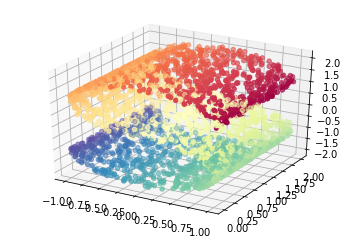

In [2]:
n_points = 3000
X, color = datasets.samples_generator.make_s_curve(n_points, random_state=0)
n_components = 2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral);

standard: 0.38 sec
ltsa: 1.4 sec
hessian: 0.86 sec
modified: 0.72 sec
Isomap: 3.9 sec
MDS: 19 sec
SpectralEmbedding: 0.4 sec
t-SNE: 34 sec


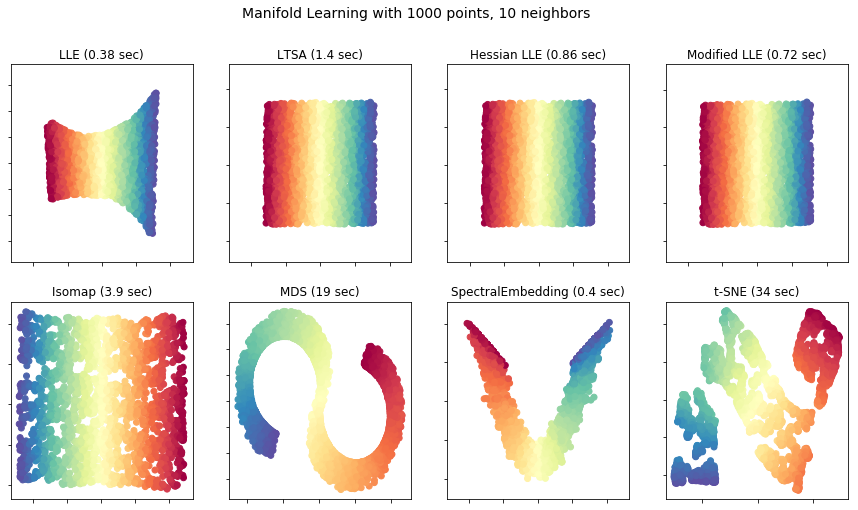

In [3]:
# http://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html
n_neighbors = 10
fig = plt.figure(figsize=(15, 8))
plt.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)
methods = ['standard', 'ltsa', 'hessian', 'modified']
labels = ['LLE', 'LTSA', 'Hessian LLE', 'Modified LLE']

for i, method in enumerate(methods):
    t0 = time()
    Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                        eigen_solver='auto',
                                        method=method).fit_transform(X)
    t1 = time()
    print("%s: %.2g sec" % (methods[i], t1 - t0))

    ax = fig.add_subplot(241 + i)
    plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    plt.title("%s (%.2g sec)" % (labels[i], t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')

t0 = time()
Y = manifold.Isomap(n_neighbors, n_components).fit_transform(X)
t1 = time()
print("Isomap: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(245)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("Isomap (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

t0 = time()
mds = manifold.MDS(n_components, max_iter=100, n_init=1)
Y = mds.fit_transform(X)
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(246)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("MDS (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

t0 = time()
se = manifold.SpectralEmbedding(n_components=n_components,
                                n_neighbors=n_neighbors)
Y = se.fit_transform(X)
t1 = time()
print("SpectralEmbedding: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(247)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("SpectralEmbedding (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

t0 = time()
tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
Y = tsne.fit_transform(X)
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(248)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight');

PCA: 0.0019 sec
linear KPCA: 0.21 sec
rbf KPCA (gamma=0.123): 0.36 sec
rbf KPCA (gamma=3.693): 0.51 sec


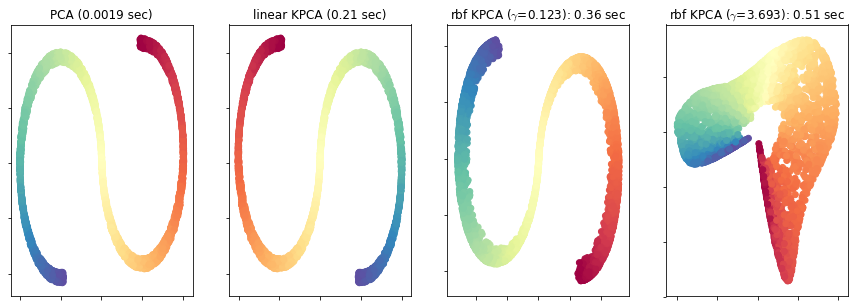

In [4]:
# PCA, linearKPCA, rbf KPCA with different gamma
fig = plt.figure(figsize=(15, 5))
D = squareform(pdist(X, 'euclidean'))
gamma = 1./(np.median(D)**2)

t0 = time()
Y = decomposition.PCA(n_components=2).fit_transform(X)
t1 = time()
print("PCA: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(141)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("PCA (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

t0 = time()
Y = decomposition.KernelPCA(n_components=2, kernel='linear').fit_transform(X)
t1 = time()
print("linear KPCA: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(142)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("linear KPCA (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

gamma1 = 0.5*gamma
t0 = time()
Y = decomposition.KernelPCA(n_components=2, kernel='rbf', gamma=gamma1).fit_transform(X)
t1 = time()
print("rbf KPCA (gamma=%.3f): %.2g sec" % ((gamma1, t1 - t0)))
ax = fig.add_subplot(143)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("rbf KPCA ($\gamma$=%.3f): %.2g sec" % ((gamma1, t1 - t0)))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

gamma2 = 15*gamma
t0 = time()
Y = decomposition.KernelPCA(n_components=2, kernel='rbf', gamma=gamma2).fit_transform(X)
t1 = time()
print("rbf KPCA (gamma=%.3f): %.2g sec" % ((gamma2, t1 - t0)))
ax = fig.add_subplot(144)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("rbf KPCA ($\gamma$=%.3f): %.2g sec" % ((gamma2, t1 - t0)))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight');

SpectralEmbedding (6 neighb)
Laplacian Eigenmap (D-W; 6 neighb)
SpectralEmbedding (1500 neighb)
Laplacian Eigenmap (D-W; 1500 neighb)


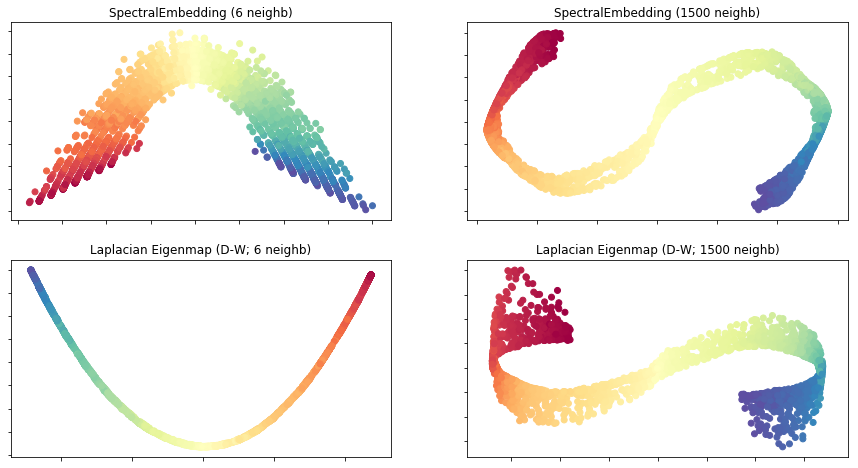

In [5]:
# laplacian eigenmaps
fig = plt.figure(figsize=(15, 8))

n_neighbors = 6
se = manifold.SpectralEmbedding(n_components=2,
                                affinity='nearest_neighbors',
                                n_neighbors=n_neighbors)
Y = se.fit_transform(X)
Y /= Y.max()
print("SpectralEmbedding (%i neighb)" % n_neighbors)
ax = fig.add_subplot(221)
ax.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("SpectralEmbedding (%i neighb)" % n_neighbors)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

# adjacency matrix from the graph for n_neighbors
nbrs = neighbors.NearestNeighbors(n_neighbors=n_neighbors, algorithm='ball_tree').fit(X)
W = nbrs.kneighbors_graph(X).toarray()
W = 0.5*(W + W.T)
np.fill_diagonal(W, 0)
# degree matrix D from W.
D = np.diag(np.apply_along_axis(arr=W, func1d=np.sum, axis=0))
# graph Laplacian
L = D - W
# compute eigenvalues and vectors (ignore first zero)
E, V = np.linalg.eig(L)
E, V = E[np.argsort(E)[::-1]], V[:,np.argsort(E)[::-1]]
Y = np.dot(V.real, np.diag(np.sqrt(np.abs(E.real))))
Y /= Y[:,[-2,-3]].max()
print("Laplacian Eigenmap (D-W; %i neighb)" % n_neighbors)
ax = fig.add_subplot(223)
ax.scatter(Y[:, -2], Y[:, -3], c=color, cmap=plt.cm.Spectral)
plt.title("Laplacian Eigenmap (D-W; %i neighb)" % n_neighbors)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

n_neighbors = 1500
se = manifold.SpectralEmbedding(n_components=2,
                                affinity='nearest_neighbors',
                                n_neighbors=n_neighbors)
Y = se.fit_transform(X)
Y /= Y.max()
print("SpectralEmbedding (%i neighb)" % n_neighbors)
ax = fig.add_subplot(222)
ax.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("SpectralEmbedding (%i neighb)" % n_neighbors)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

# adjacency matrix from the graph for n_neighbors
nbrs = neighbors.NearestNeighbors(n_neighbors=n_neighbors, algorithm='ball_tree').fit(X)
W = nbrs.kneighbors_graph(X).toarray()
W = 0.5*(W + W.T)
np.fill_diagonal(W, 0)
# degree matrix D from W.
D = np.diag(np.apply_along_axis(arr=W, func1d=np.sum, axis=0))
# graph Laplacian
L = D - W
# compute eigenvalues and vectors (ignore first zero)
E, V = np.linalg.eig(L)
E, V = E[np.argsort(E)[::-1]], V[:,np.argsort(E)[::-1]]
Y = np.dot(V.real, np.diag(np.sqrt(np.abs(E.real))))
Y /= Y[:,[-2,-3]].max()
print("Laplacian Eigenmap (D-W; %i neighb)" % n_neighbors)
ax = fig.add_subplot(224)
ax.scatter(Y[:, -2], Y[:, -3], c=color, cmap=plt.cm.Spectral)
plt.title("Laplacian Eigenmap (D-W; %i neighb)" % n_neighbors)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight');

linear SimEc: 9.6 sec
isomap SimEc: 14 sec


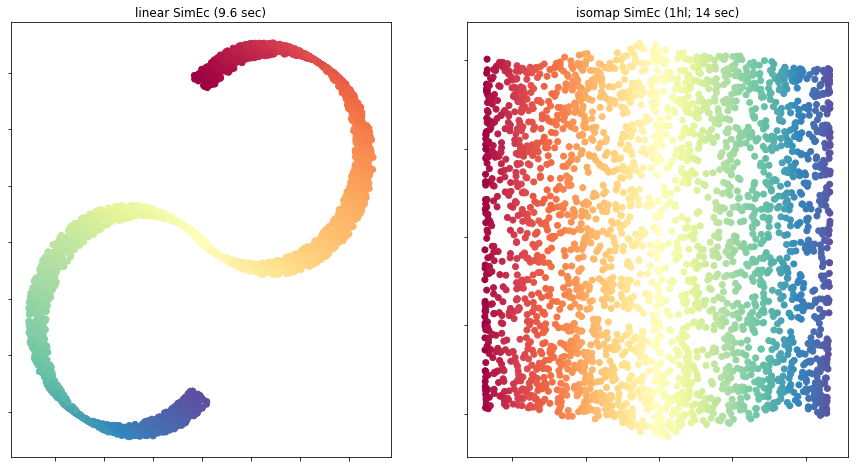

In [6]:
# simec with linear kernel --> global structure, like linear kpca
n_targets = 1000
fig = plt.figure(figsize=(15, 8))
K_lin = center_K(linear_kernel(X))
t0 = time()
simec = SimilarityEncoder(X.shape[1], 2, n_targets, l2_reg_emb=0.01, s_ll_reg=1., 
                          S_ll=K_lin[:n_targets,:n_targets], opt=keras.optimizers.Adamax(lr=0.1))
simec.fit(X, K_lin[:,:n_targets], verbose=False)
Y = simec.transform(X)
t1 = time()
print("linear SimEc: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(121)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("linear SimEc (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

# simec with geodesic distance (from isomap) --> local manifold
# since the geodesic distance is not trivially derived from the original data
# like the linear kernel, we need to add a non-linear hidden layer to get a
# good embedding similar to the original isomap embedding
i = manifold.Isomap(n_components=2, n_neighbors=10).fit(X)
G = center_K(-0.5*(i.dist_matrix_**2))
t0 = time()
simec = SimilarityEncoder(X.shape[1], 2, n_targets, hidden_layers=[(25, "tanh")], l2_reg_emb=0.01, 
                          orth_reg=0.01, s_ll_reg=1., S_ll=G[:n_targets,:n_targets], 
                          opt=keras.optimizers.Adamax(lr=0.01))
simec.fit(X, G[:,:n_targets], epochs=40, verbose=False)
Y = simec.transform(X)
t1 = time()
print("isomap SimEc: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(122)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("isomap SimEc (1hl; %.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

keras.backend.clear_session()

## the cut sphere

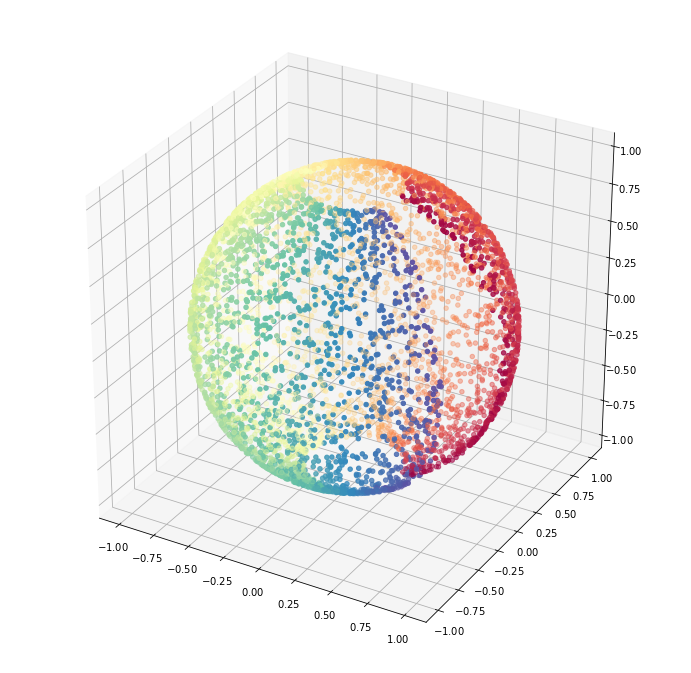

In [7]:
# create the sphere
X, color = make_sphere(5000)

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=color, cmap=plt.cm.Spectral);

PCA: 0.0022 sec
Isomap: 14 sec
linear SimEc: 14 sec
isomap SimEc: 23 sec


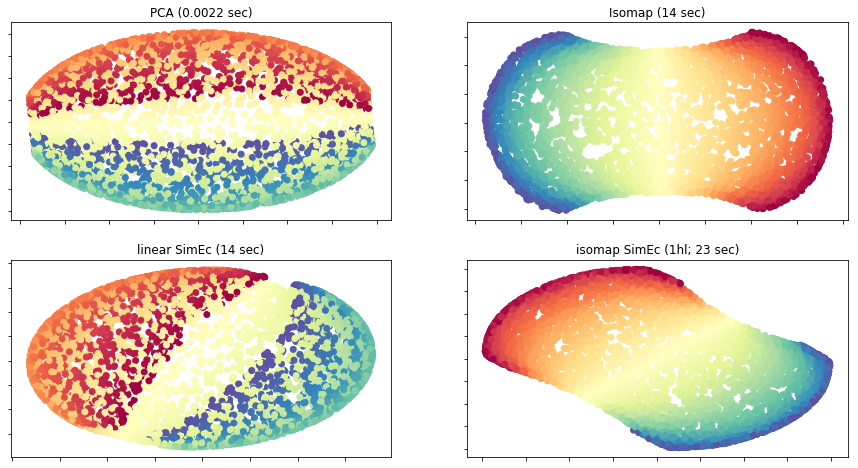

In [8]:
fig = plt.figure(figsize=(15, 8))

# PCA
t0 = time()
Y = decomposition.PCA(n_components=2).fit_transform(X)
t1 = time()
print("PCA: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(221)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("PCA (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

# Isomap
t0 = time()
isomap = manifold.Isomap(n_components=2, n_neighbors=10).fit(X)
Y = isomap.transform(X)
t1 = time()
print("Isomap: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(222)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("Isomap (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

# simec with linear kernel --> global structure, like linear kpca
n_targets = 1000
K_lin = center_K(linear_kernel(X))
t0 = time()
simec = SimilarityEncoder(X.shape[1], 2, n_targets, l2_reg_emb=0.01, s_ll_reg=0.5, 
                          S_ll=K_lin[:n_targets,:n_targets], opt=keras.optimizers.Adamax(lr=0.1))
simec.fit(X, K_lin[:,:n_targets], verbose=False)
Y = simec.transform(X)
t1 = time()
print("linear SimEc: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(223)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("linear SimEc (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

# simec with geodesic distance (from isomap) --> local manifold
# since the geodesic distance is not trivially derived from the original data
# like the linear kernel, we need to add non-linear hidden layers to get a
# good embedding similar to the original isomap embedding
G = center_K(-0.5*(isomap.dist_matrix_**2))
t0 = time()
simec = SimilarityEncoder(X.shape[1], 2, n_targets, hidden_layers=[(25, "tanh"), (10, "tanh")], 
                          l2_reg_emb=0.01, orth_reg=1., s_ll_reg=1., S_ll=G[:n_targets,:n_targets], 
                          opt=keras.optimizers.Adamax(lr=0.02))
simec.fit(X, G[:,:n_targets], epochs=40, verbose=False)
Y = simec.transform(X)
t1 = time()
print("isomap SimEc: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(224)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("isomap SimEc (2hl; %.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight');